In [6]:
from methods import *

In [ ]:
(
    m,
    loader,
    optim,
    model,
    num_domain,
    num_group,
    lr_scheduler,
    device,
    n,
    num_feature,
    num_class,
) = exp_init(
    'waterbirds',
    128,
    'y',
    'a',
    0,
    0,
    'fairness',
    0,
    True,
    '%s/privateDemographics/models/waterbirds/erm_num_epoch_360_batch_size_128_lr_1e-05_subsample_False_weight_decay_1_best.model' % root_dir,
    123,
    'erm',
    torch.device('cpu'),
)

In [ ]:
(inputs, true_domain, idx_class, true_group, idx_mode, seed, num_class) = get_domain_george(
    loader,
    num_domain,
    num_class,
    123,
)

In [4]:
import umap

In [5]:
inputs

array([[0.19409668, 0.30253807, 1.0947558 , ..., 0.10340338, 0.15202864,
        0.17909712],
       [0.22415236, 0.27610946, 0.23466566, ..., 0.41363725, 0.53521776,
        0.22774144],
       [0.0500347 , 0.26553   , 0.4852127 , ..., 0.6409124 , 0.3142382 ,
        0.27291188],
       ...,
       [0.79879606, 0.5527432 , 0.19613913, ..., 0.39260328, 0.1316437 ,
        0.1376287 ],
       [0.6854566 , 0.8681218 , 0.1487032 , ..., 0.3264151 , 0.1716453 ,
        0.2419265 ],
       [0.9258257 , 0.46162254, 0.32339802, ..., 0.41059202, 0.6768534 ,
        0.294721  ]], dtype=float32)

In [ ]:
for y in range(num_class):
    y_idx = idx_class == y
    reducer = umap.UMAP(random_state = seed, n_components = 2, n_neighbors = 10, min_dist = 0)
    umap_labels = reducer.fit_transform(inputs[y_idx])
#     print(np.unique(umap_labels))

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [1]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt # for showing handwritten digits

# Skleran
from sklearn.datasets import load_digits # for MNIST data
from sklearn.model_selection import train_test_split # for splitting data into train and test samples

# UMAP dimensionality reduction
from umap import UMAP

Shape of digit images:  (1797, 8, 8)
Shape of X (main data):  (1797, 64)
Shape of y (true labels):  (1797,)


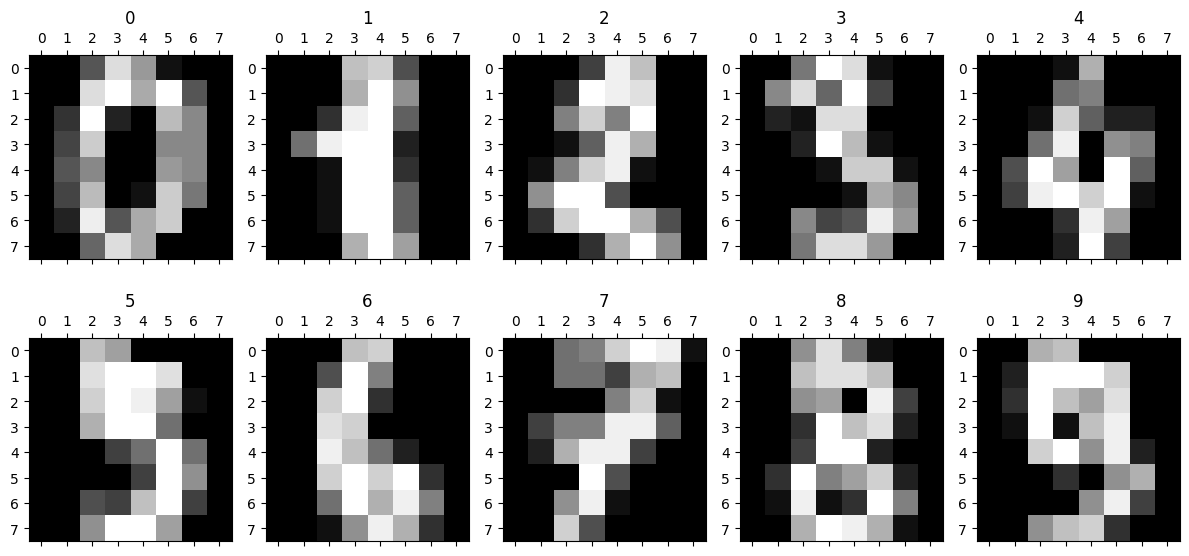

In [2]:
# Load digits data 
digits = load_digits()

# Load arrays containing digit data (64 pixels per image) and their true labels
X, y = load_digits(return_X_y=True)

# Some stats
print('Shape of digit images: ', digits.images.shape)
print('Shape of X (main data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
plt.gray() 
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(digits.images[n])
        axs[i,j].set(title=y[n])
        n=n+1
plt.show() 

In [3]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
# Configure UMAP hyperparameters
reducer = UMAP(n_neighbors=100, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=3, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=1000, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.1, # default 0.1, The effective minimum distance between embedded points.
               spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=1, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

# Fit and transform the data
X_trans = reducer.fit_transform(X)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
X_trans

array([[ 8.127952 ,  5.784982 , 10.150145 ],
       [-2.240992 ,  6.885745 ,  3.9154088],
       [-2.1310394,  7.470133 ,  5.1598935],
       ...,
       [-2.4755106,  7.9232817,  4.9866757],
       [-1.3146932,  9.689214 ,  7.4862304],
       [-2.4670372,  8.355571 ,  5.6468906]], dtype=float32)